In [1]:
import tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
dataset

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [5]:
train = dataset['Open']

In [6]:
train = train.values

In [7]:
train

array([325.25, 331.27, 329.83, ..., 793.7 , 783.33, 782.75])

In [8]:
train = train.reshape((1258,1))

In [9]:
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [10]:
#Feature Scaling
#Normalization
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
train_scaled = scaler.fit_transform(train)

In [13]:
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [14]:
#Creating a data structutre with 60 time steps 

In [15]:
X_train = []
y_train = []

In [16]:
for i in range(60,1258):
    X_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])

In [17]:
X_train, y_train = np.array(X_train),np.array(y_train)

In [18]:
X_train.shape

(1198, 60)

In [19]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [20]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [26]:
rnn_model = Sequential()

rnn_model.add(LSTM(units = 50 ,return_sequences = True,input_shape = (X_train.shape[1],1)))
rnn_model.add(Dropout(0.2))

rnn_model.add(LSTM(units = 50 ,return_sequences = True))
rnn_model.add(Dropout(0.2))

rnn_model.add(LSTM(units = 50 ,return_sequences = True))
rnn_model.add(Dropout(0.2))

rnn_model.add(LSTM(units = 50))
rnn_model.add(Dropout(0.2))
 
rnn_model.add(Dense(1))

rnn_model.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = ['accuracy'])

In [27]:
#You must set return_sequences=True when stacking LSTM layers 
#so that the second LSTM layer has a three-dimensional sequence input

In [28]:
rnn_model.fit(X_train,y_train,epochs = 100,batch_size = 32)

Epoch 1/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0381 - accuracy: 0.0017
Epoch 2/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0069 - accuracy: 0.0017
Epoch 3/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0064 - accuracy: 0.0017
Epoch 4/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0059 - accuracy: 0.0017
Epoch 5/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0063 - accuracy: 0.0017
Epoch 6/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0047 - accuracy: 0.0017
Epoch 7/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0044 - accuracy: 0.0017
Epoch 8/100
38/38 [==============================] - 6s 159ms/step - loss: 0.0047 - accuracy: 0.0017
Epoch 9/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0039 - accuracy: 0.0017
Epoch 10/100
38/38 [==============================] - 6s 160ms/step - loss: 0.0045 - accura

38/38 [==============================] - 6s 156ms/step - loss: 0.0018 - accuracy: 0.0017
Epoch 82/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 83/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 84/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 85/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 86/100
38/38 [==============================] - 6s 169ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 87/100
38/38 [==============================] - 6s 161ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 88/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 89/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 90/100
38/38 [==============================] - 6s 160ms/step - loss: 0.0017 - accuracy: 

In [29]:
#we hacve trained our model on stock prices of google of 5 years(2012-16).
#now we have to predict the price for the jan month of year 2017

In [45]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [46]:
real_stock_price = dataset_test['Open']

In [47]:
real_stock_price = real_stock_price.values

In [48]:
len(real_stock_price)

20

In [52]:
real_stock_price = real_stock_price.reshape((20,1))

In [54]:
#as we have trained our model in 60 time steps so we would need previous 60 days data to predict the stock price on particular day
# so for predicting stock price on 5th jan 2017 , some data of 2017 and some data of 2016 is required
#so we need to concatenate test and train set

In [58]:
dataset_total = pd.concat((dataset['Open'],dataset_test['Open']),axis = 0)

In [63]:
dataset_total = dataset_total.reset_index()

In [66]:
dataset_total = dataset_total.drop('index',axis=1)

In [71]:
dataset_total = dataset_total['Open']

In [75]:
len(dataset_total) - len(dataset_test)

1258

In [76]:
1258-60

1198

In [77]:
inputs = dataset_total[1198:].values

In [80]:
inputs = inputs.reshape(-1,1)

In [81]:
inputs =  scaler.transform(inputs)

In [84]:
inputs.shape

(80, 1)

In [91]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

In [96]:
X_test = np.array(X_test)

In [97]:
X_test

array([[0.9299055 , 0.93113327, 0.92750577, ..., 0.95725128, 0.93796041,
        0.93688146],
       [0.93113327, 0.92750577, 0.94415507, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.92750577, 0.94415507, 0.93876032, ..., 0.93688146, 0.92955205,
        0.94731751],
       ...,
       [0.96054394, 0.9371419 , 0.92841729, ..., 1.01045465, 1.02407173,
        1.03930724],
       [0.9371419 , 0.92841729, 0.90804747, ..., 1.02407173, 1.03930724,
        1.03354044],
       [0.92841729, 0.90804747, 0.8771858 , ..., 1.03930724, 1.03354044,
        0.99624228]])

In [98]:
X_test.shape

(20, 60)

In [100]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [101]:
predicted_stock_price = rnn_model.predict(X_test)

In [103]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [104]:
predicted_stock_price

array([[772.2035 ],
       [769.66   ],
       [769.71094],
       [770.7269 ],
       [773.67847],
       [779.1865 ],
       [784.5124 ],
       [787.169  ],
       [788.14594],
       [788.31354],
       [788.1276 ],
       [787.6839 ],
       [787.2254 ],
       [787.4401 ],
       [788.1354 ],
       [792.32025],
       [798.7782 ],
       [806.01544],
       [810.42755],
       [807.4263 ]], dtype=float32)

In [107]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

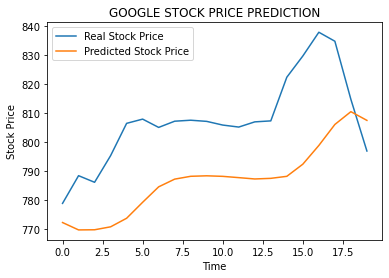

In [114]:
plt.plot(real_stock_price,label = 'Real Stock Price')
plt.plot(predicted_stock_price,label = 'Predicted Stock Price')
plt.title('GOOGLE STOCK PRICE PREDICTION')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()